# Label : *BII, AF, Normal, P, B*
index BII 231: [35142, 120082, 287941, 433855, 458808]

In [10]:
%matplotlib notebook

In [5]:
# Import package
from biosppy.signals import ecg
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]
from scipy.io import loadmat
folder_path = '/home/thangnd/git/ecg_201809/data/mit/'

In [127]:
def cut_full_signal(signal, fs, length):
    """
    fs: (Hz)
    length: length of segment (second)
    """
    num_seconds_of_signal = signal.shape[0] // fs
    num_segment_output    = num_seconds_of_signal - length + 1
    length_segment_sample = length*fs
    #
    for i in range(num_segment_output):
        temp = signal[i*fs : i*fs + length_segment_sample]
        if temp.shape[0] == length_segment_sample:
            temp = temp.reshape((1, length_segment_sample))
        else:
            break
        #
        if i == 0:
            output = temp
        #
        output = np.append(output, temp, axis=0)
    return output

In [192]:
def util_cut_by_indexs(signal, start, step, num_segment, length_segment_sample):
    output = []
    for i in range(num_segment):
        temp = signal[start+i*step : start+i*step + length_segment_sample]
        if temp.shape[0] != length_segment_sample: 
            print('break')
            break
        temp = np.reshape(temp, (1, length_segment_sample))
        try:
            output = np.append(output, temp, axis=0)
        except:
            output = temp
        
    return output
                

In [207]:
def cut_by_indexs(signal, indexs, fs, length):
    length_segment_sample = length*fs
    min_space = fs
    step      = fs
    for index in indexs:
        if index < length_segment_sample:
            num_segment = index // step - 1
            start = index - (num_segment + 1)*step
            temp = util_cut_by_indexs(signal=signal, start=start, step=step, num_segment=num_segment, length_segment_sample=length_segment_sample)
        else:
            num_segment = length_segment_sample // step - 1
            start = index - length_segment_sample
            temp = util_cut_by_indexs(signal=signal, start=start, step=step, num_segment=num_segment, length_segment_sample=length_segment_sample)
        if type(temp).__module__ != np.__name__: continue # check if util_cut_by_indexs return []
        try:
            output = np.append(output, temp, axis=0)
        except:
            output = temp
    return output
    
    

In [209]:
x = cut_by_indexs(test, [35142, 120082, 287941, 433855, 458808], 360, 30)
x.shape

(145, 10800)

In [145]:
test = loadmat(folder_path + '231m.mat')
test = test['val'][0]

data = cut_full_signal(test, 360, 30)

In [146]:
data.shape

(1777, 10800)

In [144]:
np.save('/home/thangnd/git/ecg_201809/data/SBR.npy', data)

<IPython.core.display.Javascript object>


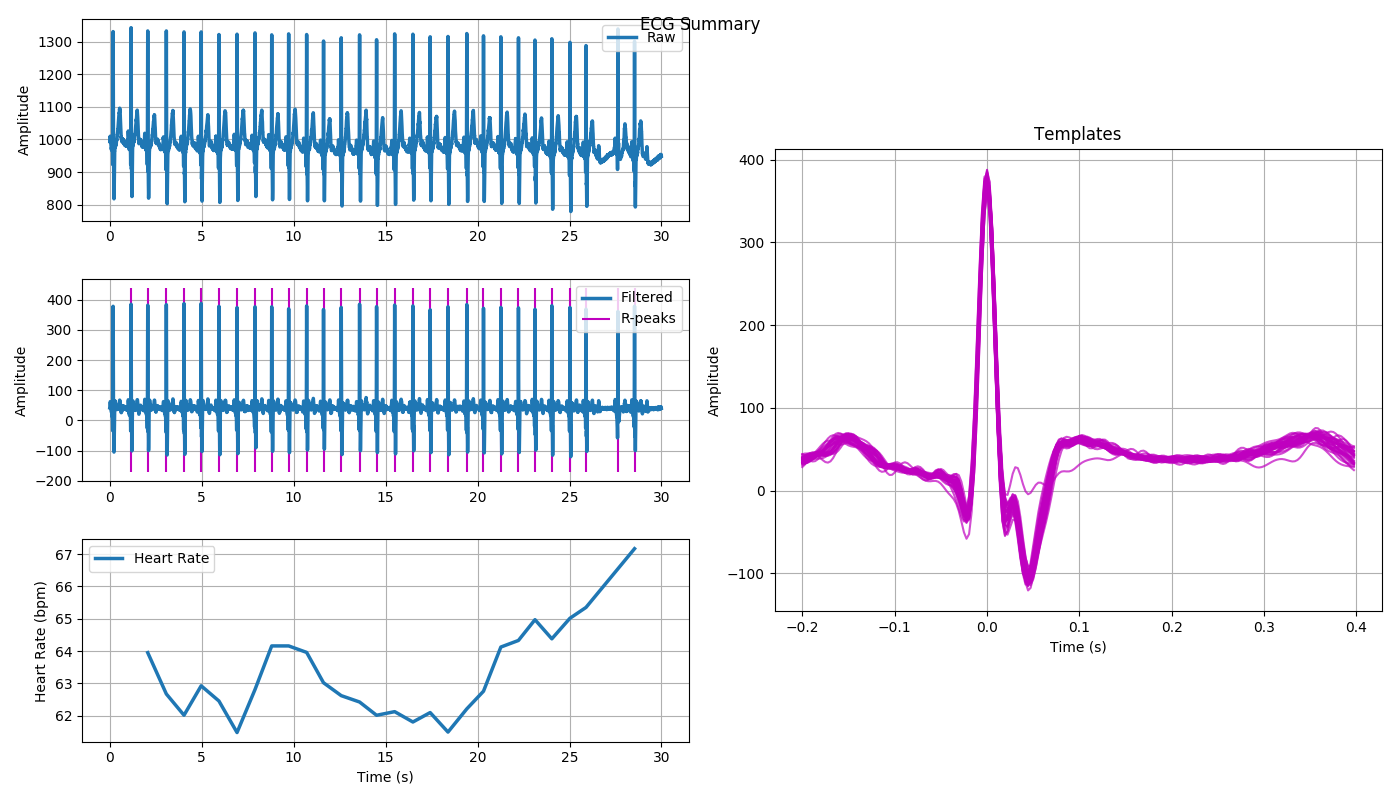

In [211]:
out_a_con = ecg.ecg(signal=x[1], sampling_rate=360, show=True)

In [188]:
a = [2,3,3]
if a:
    print("a is null")

a is null
